In [1]:
import pandas as pd
data = pd.read_excel('merge.xlsx')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [2]:
#匯入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#LogisticRegression
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import random

In [3]:
#設定xy
x=data.iloc[:,:12]
y=data["wine"]
# x
# y

In [ ]:
#preprocessing onehot-encoding
data["wine_onehot"]=data["wine"].astype("category").cat.codes
label = data['wine']
x=data.iloc[:,:14]
y=data["wine_onehot"]
x.drop(["wine"],axis=1,inplace=True)

#檢視資料
#x
#y

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42)

In [5]:
clf = LinearDiscriminantAnalysis()
clf.fit(x_train,y_train)
preds_clf=clf.predict(x_test)

In [6]:
print(classification_report(y_test,preds_clf,target_names=["red","white"]))

              precision    recall  f1-score   support

         red       0.99      0.98      0.99       341
       white       0.99      1.00      1.00       959

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



In [7]:
print(clf.score(x_train,y_train))
print(accuracy_score(y_test,preds_clf))

0.9953819511256494
0.9930769230769231


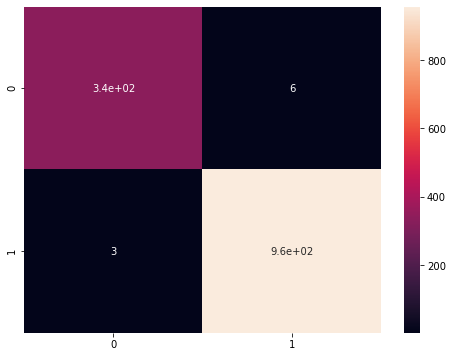

In [8]:
cm=confusion_matrix(y_test,preds_clf)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.show()